In [1]:
import os
os.chdir('../')

In [144]:
import sys
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.utils as vutils
import random

from sample import parse_args_and_config, Diffusion
from runners.diffusion import inverse_data_transform

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

torch.backends.cudnn.deterministic = True
torch.backends.benchmark = False

###############################################################################
# 1) Notebook에서 sys.argv를 직접 설정 (argparse 흉내)
###############################################################################
SCALE = 2.0
sys.argv = [
    "sample.py",
    "--config", "imagenet128_guided.yml",  # 사용하려는 config
    "--sample_type", "rbf_ecp_marginal",
    #"--sample_type", "unipc",
    "--timesteps", "10",
    "--scale", f"{SCALE}",
    "--order", "3",
    "--lower_order_final",
    "--scale_dir", f"/data/guided-diffusion/scale/rbf_ecp_marginal{SCALE}_128"
]
###############################################################################
# 2) 인자/설정 로드
###############################################################################
args, config = parse_args_and_config()

###############################################################################
# 3) Diffusion 객체 생성 -> 모델 로딩
###############################################################################
diffusion = Diffusion(args, config, rank=0)
diffusion.prepare_model()


INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,552 - Using device: cuda
INFO - sample.py - 2025-04-24 20:29:15,5

[prepare_model] Model is ready.


In [145]:
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

def show(img):
    img = (img.clamp(-1, 1) + 1) / 2          # → [0, 1]
    g   = make_grid(img.cpu(), nrow=4)         # 4×4
    plt.imshow(g.permute(1, 2, 0)); plt.axis('off'); plt.show()


In [146]:
with torch.no_grad():
    N = 16
    classes = torch.tensor([300 for _ in range(N)], dtype=torch.int).to(diffusion.device)
    noise = torch.randn(N, 3, 128, 128).to(diffusion.device)
    image, _ = diffusion.sample_image(noise, diffusion.model, classifier=diffusion.classifier, classes=classes)
    print(image.shape)


/data/guided-diffusion/scale/rbf_ecp_marginal2.0_128/NFE=10,p=3.npz loaded!
torch.Size([16, 3, 128, 128])


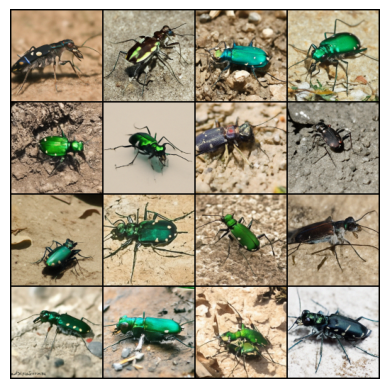

In [147]:
show(image)

In [157]:
data = np.load("/data/guided-diffusion/samples/128x128_diffusion/unipc_200_scale2.0/images/samples_0.npz")
list(data.keys())

['noises_raw', 'datas_raw', 'classes']